In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("../data/processed/cleaned_features.csv")

# 생물학적 순서 정의 (그래프 그릴 때 계속 쓸 거야)
bio_order = ['Resting', 'Undetermined_2', 'Proliferative', 'Undetermined_1', 'Hypertrophic']

print(f"📊 분석 준비 완료: {df.shape[0]}개의 세포와 {df.shape[1]}개의 피처")

📊 분석 준비 완료: 22964개의 세포와 19개의 피처


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22964 entries, 0 to 22963
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Classification               22964 non-null  object 
 1   Area µm^2                    22964 non-null  float64
 2   Length µm                    22964 non-null  float64
 3   Circularity                  22964 non-null  float64
 4   Solidity                     22964 non-null  float64
 5   Min diameter µm              22964 non-null  float64
 6   Hematoxylin: Mean            22964 non-null  float64
 7   Hematoxylin: Min             22964 non-null  float64
 8   Hematoxylin: Max             22964 non-null  float64
 9   Hematoxylin: Std.Dev.        22964 non-null  float64
 10  DAB: Mean                    22964 non-null  float64
 11  DAB: Median                  22964 non-null  float64
 12  DAB: Min                     22964 non-null  float64
 13  DAB: Max        

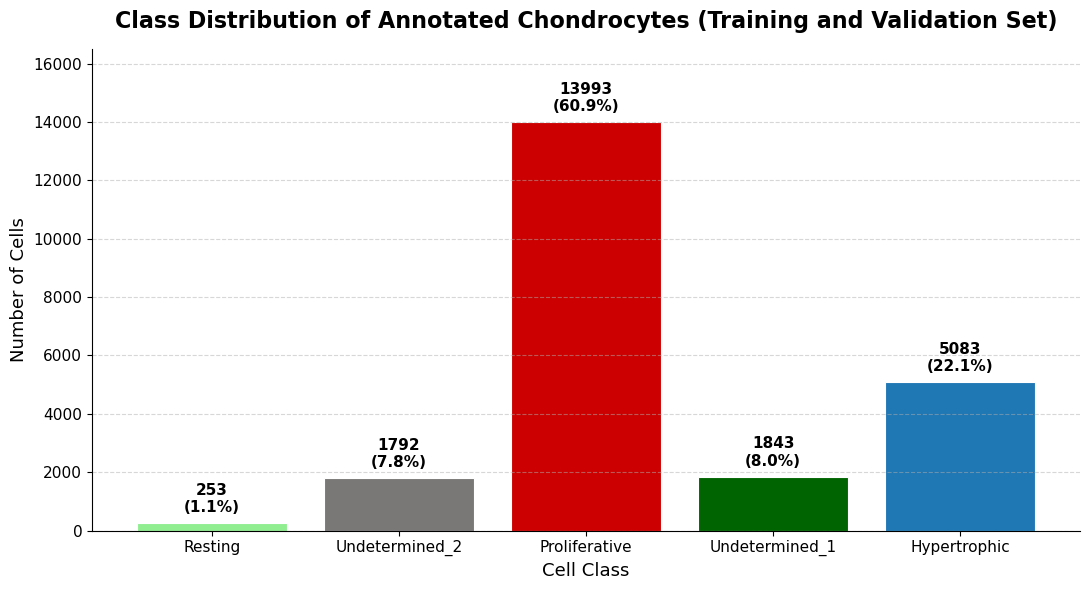

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

bio_order = ['Resting', 'Undetermined_2', 'Proliferative', 'Undetermined_1', 'Hypertrophic']

class_colors = {
    'Resting':        '#90EE90',
    'Undetermined_2': '#605D5DD6',
    'Proliferative':  '#CC0000',
    'Undetermined_1': '#006400',
    'Hypertrophic':   '#1F77B4',
}
palette = [class_colors[c] for c in bio_order]

plt.figure(figsize=(11, 6))

ax = plt.gca()
counts = df['Classification'].value_counts().reindex(bio_order)
bars = ax.bar(bio_order, counts.values, color=palette, edgecolor='white', linewidth=0.8)

plt.title('Class Distribution of Annotated Chondrocytes (Training and Validation Set)',
          fontsize=16, fontweight='bold', pad=15)

max_count = counts.max()
plt.ylim(0, max_count * 1.18)

for i, v in enumerate(counts.values):
    # Undetermined_2(검정 bar)일 때 텍스트 색도 구분 필요없음 (bar 위에 뜨니까)
    plt.text(i, v + (max_count * 0.02), f"{v}\n({v/len(df)*100:.1f}%)",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Cell Class', fontsize=13)
plt.ylabel('Number of Cells', fontsize=13)
plt.tick_params(axis='both', labelsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

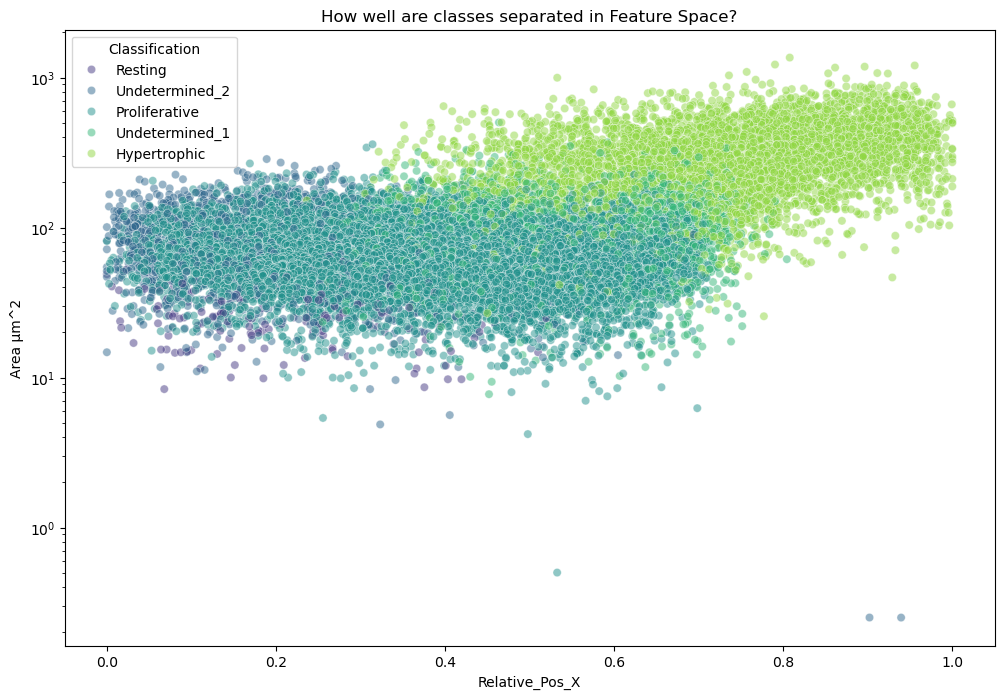

In [17]:
# Relative_Pos_X와 Area의 관계를 클래스별로 확인
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Relative_Pos_X', y='Area µm^2', 
                hue='Classification', hue_order=bio_order, 
                alpha=0.5, palette='viridis')
plt.yscale('log') # Area의 편차가 크니까 로그 스케일로!
plt.title('How well are classes separated in Feature Space?')
plt.show()